In [106]:
import numpy as np
import pandas as pd

In [107]:
df = pd.read_csv(
    "I:\\Desktop\\ML\\nlp\\slang_detector_model\\data\\raw\\FinalBalancedDataset.csv", encoding="utf8")

In [108]:
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [109]:
df.columns

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')

# EDA & Visualisation

In [110]:
val_cnt = df["Toxicity"].value_counts()

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
list(val_cnt.index)

[0, 1]

In [113]:
val_cnt

Toxicity
0    32592
1    24153
Name: count, dtype: int64

<BarContainer object of 2 artists>

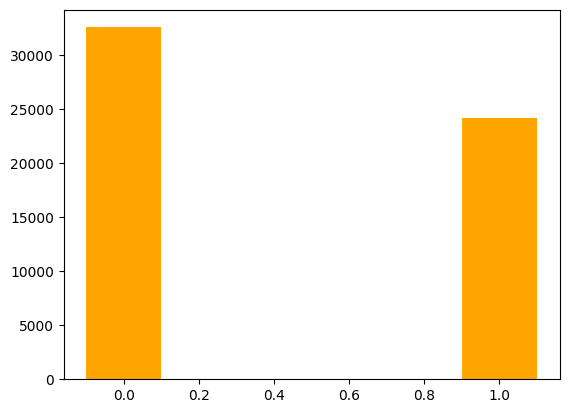

In [114]:
plt.bar(x=val_cnt.index, height=val_cnt, color='orange', width=.2)

In [115]:
(val_cnt[0] / len(df) * 100)

np.float64(57.43589743589743)

In [116]:
(val_cnt[1] / len(df) * 100)

np.float64(42.56410256410256)

# Data Preprocessing & Cleaning

In [117]:
df.columns

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')

In [118]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [119]:
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [120]:
# Lowercasing

df['tweet'] = df['tweet'].str.lower()

In [121]:
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@lifeasking: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like i ain...
56743,1,youu got wild bitches tellin you lies


In [122]:
# Remove HTML tags

import re


def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)


df["tweet"] = df["tweet"].apply(remove_html_tags)

In [123]:
# Remove URLs

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)


df["tweet"] = df["tweet"].apply(remove_url)

In [124]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [125]:
# Efficient way of Removing Punctuations

def remove_punctuations_efficient(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [126]:
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@lifeasking: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like i ain...
56743,1,youu got wild bitches tellin you lies


In [127]:
df["tweet"] = df["tweet"].apply(remove_punctuations_efficient)

In [128]:
df

,Toxicity,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation
...,...,...
56740,1,yous a muthafin lie 8220lifeasking 20pearls co...
56741,1,youve gone and broke the wrong heart baby and ...
56742,1,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies


In [129]:
df

,Toxicity,tweet
0,0,user when a father is dysfunctional and is so...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation
...,...,...
56740,1,yous a muthafin lie 8220lifeasking 20pearls co...
56741,1,youve gone and broke the wrong heart baby and ...
56742,1,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies


In [130]:
df.iloc[3]["tweet"]

'model   i love u take with u all the time in urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [131]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
' '.join([word for word in df.iloc[3]["tweet"].split() if word not in (stop_words)])

'model love u take u time urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'

In [133]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))

In [134]:
df

,Toxicity,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time urð± ðððð...
4,0,factsguide society motivation
...,...,...
56740,1,yous muthafin lie 8220lifeasking 20pearls core...
56741,1,youve gone broke wrong heart baby drove rednec...
56742,1,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitches tellin lies


In [135]:
df.iloc[3]["tweet"]

'model love u take u time urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'

In [136]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anuru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [137]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()


def tokenize_and_stem(text):
  tokens = word_tokenize(text)
  stemmed_tokens = [ps.stem(token) for token in tokens]
  return " ".join(stemmed_tokens)


In [138]:
df['tweet'] = df['tweet'].apply(tokenize_and_stem)

In [139]:
df

,Toxicity,tweet
0,0,user father dysfunct selfish drag kid dysfunct...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ðððð...
4,0,factsguid societi motiv
...,...,...
56740,1,you muthafin lie 8220lifeask 20pearl coreyeman...
56741,1,youv gone broke wrong heart babi drove redneck...
56742,1,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitch tellin lie


In [140]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(df['tweet'])  

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X2 = tfidf_vectorizer.fit_transform(df['tweet'])

In [142]:
len(vectorizer.get_feature_names_out())

63072

In [143]:
from sklearn.model_selection import train_test_split
y = df['Toxicity']
X_train, X_test, y_train, y_test = train_test_split(
X1, y, test_size=0.2, random_state=42) 

In [171]:
from sklearn.ensemble import RandomForestClassifier
# Adjust hyperparameters as needed
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [174]:
y_pred = rf_model.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9341792228390167
Confusion Matrix:
 [[6186  286]
 [ 461 4416]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6472
           1       0.94      0.91      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



# Saving the Model to disk

In [165]:
import pickle

pickle.dump(rf_model, open(
    "I:\\Desktop\\ML\\nlp\\slang_detector_model\\artefacts\\rf_model.pkl", "wb"))
pickle.dump(vectorizer, open(
    "I:\\Desktop\\ML\\nlp\\slang_detector_model\\artefacts\\count_vectorizer.pkl", "wb"))

# Loading the Model to predict

In [166]:
model = pickle.load(
    open("I:\\Desktop\\ML\\nlp\\slang_detector_model\\artefacts\\rf_model.pkl", "rb"))



vec = pickle.load(open(
    "I:\\Desktop\\ML\\nlp\\slang_detector_model\\artefacts\\count_vectorizer.pkl", "rb"))

In [167]:
features = vec.transform(
    ["Hey shut up you moron.", "Hey Cutey pie you are too sweet", "you idiot dont talk like that."])

pred = model.predict(features)

In [168]:
len((features.toarray()))

3

In [169]:
pred

array([1, 0, 1])

# Hyper Param Tuning

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

# Initialize the model
rf_model = RandomForestClassifier()

# Use GridSearchCV (exhaustive search)
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed
# grid_search.fit(X_train, y_train)

# Or use RandomizedSearchCV (random sampling)
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', verbose=2)
random_search.fit(X_train, y_train)

# Get the best parameters
# print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best parameters (RandomizedSearchCV):", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total 

i:\Desktop\ML\nlp\slang_detector_model\env\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [48]:
best_rf_model = RandomForestClassifier(
    **random_search.best_params_)  # Or use random_search.best_params_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [49]:
best_y_pred = best_rf_model.predict(X_test)

In [50]:
print("Accuracy:", accuracy_score(y_test, best_y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7638558463300731
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6472
           1       0.94      0.91      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.94      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349

